In [1]:
import torch
import torchvision
import numpy as np
from PIL import Image, ImageDraw
import sys
import matplotlib.pyplot as plt  
%matplotlib inline

torch.__version__

'1.1.0'

In [2]:
img_tensor = torch.randn([1, 3, 800, 800], requires_grad=True).float()
img_tensor.shape

torch.Size([1, 3, 800, 800])

In [3]:
vgg = torchvision.models.vgg16(pretrained=False)

In [4]:
vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [5]:
features_layers = list(vgg.features)
features_layers, len(features_layers)

([Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inplace),
  Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inplace),
  MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
  Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inplace),
  Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inplace),
  MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
  Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inplace),
  Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inplace),
  Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inplace),
  MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
  Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
  ReLU(inplace),
  Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [6]:
req_features = []
k = img_tensor.clone()
print(k.data.shape)
for features_layer in features_layers:
   print(features_layer, end='\t')
   k = features_layer(k)
   print(k.data.shape)
   if k.size()[2] < 800//16:
       break
   req_features.append(features_layer)
   out_channels = k.size()[1]
print(len(req_features)) #30
print(out_channels) # 512

torch.Size([1, 3, 800, 800])
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))	torch.Size([1, 64, 800, 800])
ReLU(inplace)	torch.Size([1, 64, 800, 800])
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))	torch.Size([1, 64, 800, 800])
ReLU(inplace)	torch.Size([1, 64, 800, 800])
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)	torch.Size([1, 64, 400, 400])
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))	torch.Size([1, 128, 400, 400])
ReLU(inplace)	torch.Size([1, 128, 400, 400])
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))	torch.Size([1, 128, 400, 400])
ReLU(inplace)	torch.Size([1, 128, 400, 400])
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)	torch.Size([1, 128, 200, 200])
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))	torch.Size([1, 256, 200, 200])
ReLU(inplace)	torch.Size([1, 256, 200, 200])
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1)

In [7]:
# req_features 为原VGG的features去最后MaxPooling的结构，最后输出为[1, 512, 50, 50]
for f in req_features:
    print(f)

Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ReLU(inplace)
Conv2d(512, 512, kernel_size=(3, 3), stride

In [8]:
faster_rcnn_fe_extractor = torch.nn.Sequential(*req_features)
out_map = faster_rcnn_fe_extractor(img_tensor)
print(out_map.size())
# Out: torch.Size([1, 512, 50, 50])

torch.Size([1, 512, 50, 50])


### out_map是backbone network提取出来的特征图

## Anchor

In [9]:
ratios = [0.5, 1, 2]
anchor_scales = [8, 16, 32]
sub_sample = 16

In [10]:
# 一个特征点对应原图片中的16*16个像素点区域
fe_size = (800//16)
# ctr_x， ctr_y: 每个特征点对应原图片区域的右下方坐标
ctr_x = np.arange(16, (fe_size+1) * 16, 16)
ctr_y = np.arange(16, (fe_size+1) * 16, 16)
print(len(ctr_x))  # 共50*50个特征点，将原图片分割成50*50=2500个区域
print(ctr_x)

50
[ 16  32  48  64  80  96 112 128 144 160 176 192 208 224 240 256 272 288
 304 320 336 352 368 384 400 416 432 448 464 480 496 512 528 544 560 576
 592 608 624 640 656 672 688 704 720 736 752 768 784 800]


In [11]:
for right_down_cordinate in zip(ctr_x, ctr_y):
    print(right_down_cordinate, end='\t')

(16, 16)	(32, 32)	(48, 48)	(64, 64)	(80, 80)	(96, 96)	(112, 112)	(128, 128)	(144, 144)	(160, 160)	(176, 176)	(192, 192)	(208, 208)	(224, 224)	(240, 240)	(256, 256)	(272, 272)	(288, 288)	(304, 304)	(320, 320)	(336, 336)	(352, 352)	(368, 368)	(384, 384)	(400, 400)	(416, 416)	(432, 432)	(448, 448)	(464, 464)	(480, 480)	(496, 496)	(512, 512)	(528, 528)	(544, 544)	(560, 560)	(576, 576)	(592, 592)	(608, 608)	(624, 624)	(640, 640)	(656, 656)	(672, 672)	(688, 688)	(704, 704)	(720, 720)	(736, 736)	(752, 752)	(768, 768)	(784, 784)	(800, 800)	

In [12]:
index = 0
# ctr: 每个特征点对应原图片区域的中心点
ctr = dict()
for x in range(len(ctr_x)):
   for y in range(len(ctr_y)):
       ctr[index] = [-1, -1]
       ctr[index][1] = ctr_x[x] - 8
       ctr[index][0] = ctr_y[y] - 8
       index +=1
# print(ctr) # {key = index : value = [x, y]}
# {0: [8, 8], 1: [24, 8],...} index:[centor_i_x, centor_i_y]
print(len(ctr))  # 将原图片分割成50*50=2500个区域的中心点

2500


In [13]:
# 初始化：每个区域有9个anchors候选框，每个候选框的坐标(y1, x1, y2, x2)
anchors = np.zeros(((fe_size * fe_size * 9), 4))
# (22500, 4)
print(anchors.shape)
index = 0
h_w_set = set()
# 将候选框的坐标赋值到anchors
for c in ctr:
    # print(c, ctr[c]) # 0 [8, 8]
    ctr_y, ctr_x = ctr[c]
    for i in range(len(ratios)):
        for j in range(len(anchor_scales)):
            # anchor_scales 是针对特征图的，所以需要乘以下采样"sub_sample"
            h = sub_sample * anchor_scales[j] * np.sqrt(ratios[i])
            w = sub_sample * anchor_scales[j] * np.sqrt(1./ ratios[i])
            anchors[index, 0] = ctr_y - h / 2.
            anchors[index, 1] = ctr_x - w / 2.
            anchors[index, 2] = ctr_y + h / 2.
            anchors[index, 3] = ctr_x + w / 2.
            
            h_w_set.add((h,w))
            
            index += 1

# (22500, 4)
print(anchors.shape)
print(h_w_set, len(h_w_set), sep='\n')

(22500, 4)
(22500, 4)
{(90.50966799187809, 181.01933598375618), (128.0, 128.0), (256.0, 256.0), (512.0, 512.0), (181.01933598375618, 90.50966799187809), (724.0773439350247, 362.03867196751236), (362.03867196751236, 181.01933598375618), (181.01933598375618, 362.03867196751236), (362.03867196751236, 724.0773439350247)}
9


In [14]:
from IPython.display import display # to display images

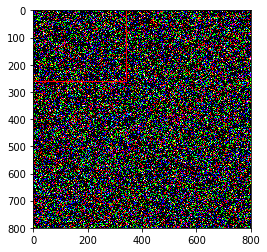

In [52]:
img_npy = img_tensor.detach().numpy()
img_npy = np.transpose(img_npy[0], (1, 2, 0)).astype(np.float32)
img = Image.fromarray(np.uint8(img_npy))
# img.show()
draw = ImageDraw.Draw(img)

index = np.random.randint(0, anchors.shape[0])
draw.rectangle([(anchors[index, 1], anchors[index, 0]), (anchors[index, 3], anchors[index, 2])], outline=(255, 0, 0), width=3)
plt.imshow(np.asarray(img))
# display(img)

In [53]:
# 假设 图片中的两个目标框"ground-truth"
bbox = np.asarray([[20, 30, 400, 500], [300, 400, 500, 600]], dtype=np.float32) # [y1, x1, y2, x2] format
draw.rectangle([(30, 20), (500, 400)], outline=(100, 255, 0), width=5)
draw.rectangle([(400, 300), (600, 500)], outline=(100, 255, 0), width=5)

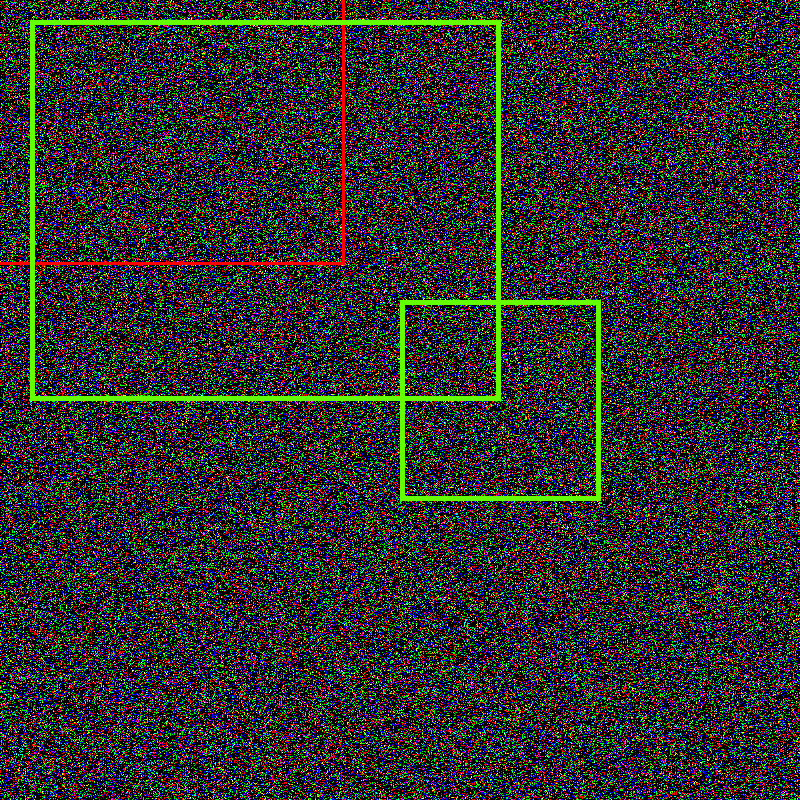

In [54]:
display(img)

In [55]:
labels = np.asarray([6, 8], dtype=np.int8)
labels

array([6, 8], dtype=int8)

In [56]:
# 去除坐标出界的边框，保留图片内的框——图片内框
valid_anchor_index = np.where(
       (anchors[:, 0] >= 0) &
       (anchors[:, 1] >= 0) &
       (anchors[:, 2] <= 800) &
       (anchors[:, 3] <= 800)
   )[0]  # 该函数返回数组中满足条件的index
print(valid_anchor_index.shape)  # (8940,)，表明有8940个框满足条件

(8940,)


In [57]:
# 获取有效anchor（即边框都在图片内的anchor）的坐标
valid_anchor_boxes = anchors[valid_anchor_index]
print(valid_anchor_boxes.shape)  # (8940, 4)

(8940, 4)


In [60]:
# 计算有效anchor框"valid_anchor_boxes"与目标框"bbox"的IOU
ious = np.empty((len(valid_anchor_boxes), 2), dtype=np.float32)
ious.fill(0)
print(bbox)

[[ 20.  30. 400. 500.]
 [300. 400. 500. 600.]]


### 计算每个有效anchor与ground-truth的IOU

In [61]:
for num1, i in enumerate(valid_anchor_boxes):
   ya1, xa1, ya2, xa2 = i
   anchor_area = (ya2 - ya1) * (xa2 - xa1)  # anchor框面积
   for num2, j in enumerate(bbox):
       yb1, xb1, yb2, xb2 = j
       box_area = (yb2 - yb1) * (xb2 - xb1)  # 目标框面积
       inter_x1 = max([xb1, xa1])
       inter_y1 = max([yb1, ya1])
       inter_x2 = min([xb2, xa2])
       inter_y2 = min([yb2, ya2])
       if (inter_x1 < inter_x2) and (inter_y1 < inter_y2):
           iter_area = (inter_y2 - inter_y1) * (inter_x2 - inter_x1)  # anchor框和目标框的相交面积
           iou = iter_area / (anchor_area + box_area - iter_area)  # IOU计算
       else:
           iou = 0.

       ious[num1, num2] = iou

In [62]:
ious.shape # (8940, 2)  表示每个anchor框与所有目标框的IOU，这里所有的目标框共2个。

(8940, 2)

In [63]:
gt_argmax_ious = ious.argmax(axis=0)  
# 找出每个目标框最大IOU的anchor框index，共2个
print(gt_argmax_ious)  
# 共2个，与图片内目标框gt数量一致

[2262 5620]


In [64]:
gt_max_ious = ious[gt_argmax_ious, np.arange(ious.shape[1])]  
# 获取每个目标框最大IOU的值，与gt_argmax_ious对应
print(gt_max_ious)  
# 共2个，与图片内目标框数量一致

[0.68130493 0.61035156]


In [65]:
argmax_ious = ious.argmax(axis=1)  
# 找出每个anchor框最大IOU的目标框index，共8940个
print(argmax_ious.shape)  
# (8940,) 每个anchor框都会对应一个最大IOU的目标框

(8940,)


In [66]:
max_ious = ious[np.arange(len(valid_anchor_index)), argmax_ious]  
# 获取每个anchor框的最大IOU值， 与argmax_ious对应
print(max_ious.shape)  
# (8940,),每个anchor框内都会有一个最大值

(8940,)


In [67]:
gt_argmax_ious = np.where(ious == gt_max_ious)[0]  
# 根据上面获取的目标最大IOU值，获取等于该值的index
print(gt_argmax_ious.shape)  # (18,) 共计18个
for index in gt_argmax_ious:
    draw.rectangle([(valid_anchor_boxes[index, 1], valid_anchor_boxes[index, 0]),
                    (valid_anchor_boxes[index, 3], valid_anchor_boxes[index, 2])], outline=(255, 0, 0))
img.show()

(18,)


In [68]:
pos_iou_threshold = 0.7
neg_iou_threshold = 0.3
label = np.empty((len(valid_anchor_index), ), dtype=np.int32)
label.fill(-1)
print(label.shape)  # (8940,)

(8940,)


In [69]:
label[max_ious < neg_iou_threshold] = 0  
# anchor框内最大IOU值小于neg_iou_threshold，设为0
label[gt_argmax_ious] = 1  
# anchor框有全局最大IOU值，设为1
label[max_ious >= pos_iou_threshold] = 1  
# anchor框内最大IOU值大于等于pos_iou_threshold，设为1

In [70]:
pos_ratio = 0.5
n_sample = 256
n_pos = pos_ratio * n_sample  # 正例样本数

In [71]:
# 随机获取n_pos个正例，
pos_index = np.where(label == 1)[0]
if len(pos_index) > n_pos:
   disable_index = np.random.choice(pos_index, size=(len(pos_index) - n_pos), replace=False)
   label[disable_index] = -1

In [72]:
n_neg = n_sample - np.sum(label == 1)
neg_index = np.where(label == 0)[0]

In [73]:
if len(neg_index) > n_neg:
   disable_index = np.random.choice(neg_index, size=(len(neg_index) - n_neg), replace = False)
   label[disable_index] = -1

In [74]:
print(np.sum(label == 1))  # 18个正例
print(np.sum(label == 0))  # 256-18=238个负例

18
238


In [78]:
print(argmax_ious)
print(bbox)

[0 0 0 ... 0 0 0]
[[ 20.  30. 400. 500.]
 [300. 400. 500. 600.]]


In [75]:
# 现在让我们用具有最大iou的ground truth对象为每个anchor box分配位置。
# 注意，我们将为所有有效的anchor box分配anchor locs，而不考虑其标签
# 稍后在计算损失时，我们可以使用简单的过滤器删除它们。
max_iou_bbox = bbox[argmax_ious]  
# 有效anchor框对应的目标框坐标  (8940, 4)
print(max_iou_bbox)
print(max_iou_bbox.shape)  
# (8940, 4)，共有8940个有效anchor框，每个anchor有坐标值（y1, x1, y2, x2）

[[ 20.  30. 400. 500.]
 [ 20.  30. 400. 500.]
 [ 20.  30. 400. 500.]
 ...
 [ 20.  30. 400. 500.]
 [ 20.  30. 400. 500.]
 [ 20.  30. 400. 500.]]
(8940, 4)


In [79]:
# 有效anchor的中心点和宽高：ctr_x, ctr_y, width, height
height = valid_anchor_boxes[:, 2] - valid_anchor_boxes[:, 0]
width = valid_anchor_boxes[:, 3] - valid_anchor_boxes[:, 1]
ctr_y = valid_anchor_boxes[:, 0] + 0.5 * height
ctr_x = valid_anchor_boxes[:, 1] + 0.5 * width

In [80]:
# 有效anchor对应目标框的中心点和宽高: base_ctr_x, base_ctr_y, base_width, base_height
base_height = max_iou_bbox[:, 2] - max_iou_bbox[:, 0]
base_width = max_iou_bbox[:, 3] - max_iou_bbox[:, 1]
base_ctr_y = max_iou_bbox[:, 0] + 0.5 * base_height
base_ctr_x = max_iou_bbox[:, 1] + 0.5 * base_width

In [81]:
# 有效anchor转为目标框的系数（dy，dx是平移系数；dh，dw是缩放系数）
eps = np.finfo(height.dtype).eps
height = np.maximum(height, eps)
width = np.maximum(width, eps)
dy = (base_ctr_y - ctr_y) / height
dx = (base_ctr_x - ctr_x) / width
dh = np.log(base_height / height)
dw = np.log(base_width / width)
anchor_locs = np.vstack((dy, dx, dh, dw)).transpose()
# print anchor_locs
print(anchor_locs.shape)

(8940, 4)


In [82]:
#  anchor_labels ： 每个anchor框对应的label（-1：无效anchor，0：负例有效anchor，1：正例有效anchor）
anchor_labels = np.empty((len(anchors),), dtype=label.dtype)
anchor_labels.fill(-1)
anchor_labels[valid_anchor_index] = label

In [84]:
#  anchor_locations： 每个有效anchor框转为目标框的系数
anchor_locations = np.empty((len(anchors),) + anchors.shape[1:], dtype=anchor_locs.dtype)
anchor_locations.fill(0)
anchor_locations[valid_anchor_index, :] = anchor_locs
print(anchor_locations.shape)

(22500, 4)


## RPN

In [85]:
# Region Proposal Network (RPN)
import torch.nn as nn
mid_channels = 512
in_channels = 512 
# depends on the output feature map. in vgg 16 it is equal to 512
n_anchor = 9 
# Number of anchors at each location
conv1 = nn.Conv2d(in_channels, mid_channels, 3, 1, 1)
reg_layer = nn.Conv2d(mid_channels, n_anchor * 4, 1, 1, 0)
cls_layer = nn.Conv2d(mid_channels, n_anchor * 2, 1, 1, 0) 
# I will be going to use softmax here. you can equally use sigmoid if u replace 2 with 1.
## softmax [前景， 背景]， sigmoid >=0.5 前景， < 0.5 背景

In [86]:
# conv sliding layer
conv1.weight.data.normal_(0, 0.01)
conv1.bias.data.zero_()

# Regression layer
reg_layer.weight.data.normal_(0, 0.01)
reg_layer.bias.data.zero_()

# classification layer
cls_layer.weight.data.normal_(0, 0.01)
cls_layer.bias.data.zero_()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## shape 里的 1 为 batch size

In [87]:
out_map.shape

torch.Size([1, 512, 50, 50])

In [88]:
x = conv1(out_map)  # out_map is obtained in section 1
x.shape

torch.Size([1, 512, 50, 50])

In [89]:
pred_anchor_locs = reg_layer(x)  # 回归层，计算有效anchor转为目标框的四个系数 4 * k

In [90]:
pred_cls_scores = cls_layer(x)   # 分类层，判断该anchor是否可以捕获目标(前景背景classifier) 2 * k

In [91]:
print(pred_cls_scores.shape, pred_anchor_locs.shape)  
# ((1L, 18L, 50L, 50L), (1L, 36L, 50L, 50L))
# k = 9
## 18 = 2 * 9
## 36 = 4 * 9

torch.Size([1, 18, 50, 50]) torch.Size([1, 36, 50, 50])


In [92]:
pred_anchor_locs = pred_anchor_locs.permute(0, 2, 3, 1).contiguous().view(1, -1, 4)
print(pred_anchor_locs.shape)
#Out: torch.Size([1, 22500, 4])
# [batch_size, 50 * 50 * k , 4]

torch.Size([1, 22500, 4])


In [93]:
pred_cls_scores = pred_cls_scores.permute(0, 2, 3, 1).contiguous()
print(pred_cls_scores.shape)
#Out torch.Size([1, 50, 50, 18])

torch.Size([1, 50, 50, 18])


In [94]:
objectness_score = pred_cls_scores.view(1, 50, 50, 9, 2)[:, :, :, :, 1].contiguous().view(1, -1)
print(objectness_score.shape)
#Out torch.Size([1, 22500])

torch.Size([1, 22500])


In [95]:
pred_cls_scores = pred_cls_scores.view(1, -1, 2)
print(pred_cls_scores.shape)
# Out torch.size([1, 22500, 2])
# [batch_size, 50 * 50 * k , 2]

torch.Size([1, 22500, 2])


In [96]:
# Generating proposals to feed Fast R-CNN network
n_train_pre_nms = 12000
n_train_post_nms = 2000
n_test_pre_nms = 6000
n_test_post_nms = 300
min_size = 16

In [97]:
# 转换anchor格式从 y1, x1, y2, x2 到 ctr_x, ctr_y, h, w ：
anc_height = anchors[:, 2] - anchors[:, 0]
anc_width = anchors[:, 3] - anchors[:, 1]
anc_ctr_y = anchors[:, 0] + 0.5 * anc_height
anc_ctr_x = anchors[:, 1] + 0.5 * anc_width

In [98]:
# 根据预测的四个系数，将anchor框通过平移和缩放转化为预测的目标框
dy = pred_anchor_locs_numpy[:, 0::4]
dx = pred_anchor_locs_numpy[:, 1::4]
dh = pred_anchor_locs_numpy[:, 2::4]
dw = pred_anchor_locs_numpy[:, 3::4]
ctr_y = dy * anc_height[:, np.newaxis] + anc_ctr_y[:, np.newaxis]
ctr_x = dx * anc_width[:, np.newaxis] + anc_ctr_x[:, np.newaxis]
h = np.exp(dh) * anc_height[:, np.newaxis]
w = np.exp(dw) * anc_width[:, np.newaxis]

In [ ]:
pred_anchor_locs_numpy = pred_anchor_locs[0].data.numpy()
objectness_score_numpy = objectness_score[0].data.numpy()

In [99]:
#  将预测的目标框转换为[y1, x1, y2, x2]格式
roi = np.zeros(pred_anchor_locs_numpy.shape, dtype=pred_anchor_locs_numpy.dtype)
roi[:, 0::4] = ctr_y - 0.5 * h
roi[:, 1::4] = ctr_x - 0.5 * w
roi[:, 2::4] = ctr_y + 0.5 * h
roi[:, 3::4] = ctr_x + 0.5 * w

In [100]:
# 剪辑预测框到图像上
img_size = (800, 800) #Image size
roi[:, slice(0, 4, 2)] = np.clip(roi[:, slice(0, 4, 2)], 0, img_size[0])
roi[:, slice(1, 4, 2)] = np.clip(roi[:, slice(1, 4, 2)], 0, img_size[1])
print(roi.shape)  # (22500, 4)

(22500, 4)


In [101]:
#  去除高度或宽度 < threshold的预测框 （疑问：这样会不会忽略小目标）
hs = roi[:, 2] - roi[:, 0]
ws = roi[:, 3] - roi[:, 1]
keep = np.where((hs >= min_size) & (ws >= min_size))[0]
roi = roi[keep, :]
score = objectness_score_numpy[keep]

In [102]:
# 按分数从高到低排序所有的（proposal, score）对
order = score.ravel().argsort()[::-1]
print(order.shape)  # (22500,)

(22500,)


In [103]:
# 取前几个预测框pre_nms_topN(如训练时12000，测试时300)
order = order[:n_train_pre_nms]
roi = roi[order, :]
print(roi.shape)  # (12000, 4)

(12000, 4)


## nms（非极大抑制）
计算： (去除和极大值anchor框IOU大于0.7的框——即去除相交的框，保留score大，且基本无相交的框)

In [104]:
nms_thresh = 0.7
y1 = roi[:, 0]
x1 = roi[:, 1]
y2 = roi[:, 2]
x2 = roi[:, 3]

In [105]:
areas = (x2 - x1 + 1) * (y2 - y1 + 1)

In [106]:
score = score[order]
order = score.argsort()[::-1]
print(order)  # [11999  3996  4005 ...  7995  7994     0]
keep = []
while order.size > 0:
    i = order[0]
    keep.append(i)
    xx1 = np.maximum(x1[i], x1[order[1:]])
    yy1 = np.maximum(y1[i], y1[order[1:]])
    xx2 = np.minimum(x2[i], x2[order[1:]])
    yy2 = np.minimum(y2[i], y2[order[1:]])

    w = np.maximum(0.0, xx2 - xx1 + 1)
    h = np.maximum(0.0, yy2 - yy1 + 1)
    inter = w * h
    ovr = inter / (areas[i] + areas[order[1:]] - inter)

    inds = np.where(ovr <= nms_thresh)[0]
    order = order[inds + 1]
    # print ovr
    # print order

[    0     1     2 ... 11997 11998 11999]


In [107]:
keep = keep[:n_train_post_nms]  # while training/testing , use accordingly
roi = roi[keep]  # the final region proposals（region proposals表示预测目标框）
print (roi.shape)  # (1758, 4)

(2000, 4)


In [108]:
# Proposal targets
n_sample = 128
pos_ratio = 0.25
pos_iou_thresh = 0.5
neg_iou_thresh_hi = 0.5
neg_iou_thresh_lo = 0.0

In [109]:
# 找到每个ground-truth目标（真实目标框）与region proposal（预测目标框）的iou
ious = np.empty((len(roi), 2), dtype=np.float32)
ious.fill(0)
for num1, i in enumerate(roi):
   ya1, xa1, ya2, xa2 = i
   anchor_area = (ya2 - ya1) * (xa2 - xa1)
   for num2, j in enumerate(bbox):
       yb1, xb1, yb2, xb2 = j
       box_area = (yb2 - yb1) * (xb2 - xb1)

       inter_x1 = max([xb1, xa1])
       inter_y1 = max([yb1, ya1])
       inter_x2 = min([xb2, xa2])
       inter_y2 = min([yb2, ya2])

       if (inter_x1 < inter_x2) and (inter_y1 < inter_y2):
           iter_area = (inter_y2 - inter_y1) * (inter_x2 - inter_x1)
           iou = iter_area / (anchor_area + box_area - iter_area)
       else:
           iou = 0.

       ious[num1, num2] = iou
print(ious.shape)  # (1758, 2)

(2000, 2)


In [110]:
# 找到与每个region proposal具有较高 IoU的ground truth，并且找到最大的IoU
gt_assignment = ious.argmax(axis=1)
max_iou = ious.max(axis=1)
print(gt_assignment)  # [0 0 1 ... 0 0 0]
print(max_iou)  # [0.17802152 0.17926688 0.04676317 ... 0.         0.         0.        ]
print(gt_assignment.shape)
print(max_iou.shape)

[0 0 0 ... 0 0 0]
[6.81453748e-05 1.03689894e-01 9.46514457e-02 ... 0.00000000e+00
 0.00000000e+00 7.76822343e-02]
(2000,)
(2000,)


In [111]:
# 为每个proposal分配标签：
gt_roi_label = labels[gt_assignment]
print(gt_roi_label)  # [6 6 8 ... 6 6 6]

[6 6 6 ... 6 6 6]


In [112]:
# 希望只保留n_sample*pos_ratio（128*0.25=32）个前景样本，因此如果只得到少于32个正样本，保持原状。
# 如果得到多余32个前景目标，从中采样32个样本
pos_roi_per_image = 32
pos_index = np.where(max_iou >= pos_iou_thresh)[0]
pos_roi_per_this_image = int(min(pos_roi_per_image, pos_index.size))
if pos_index.size > 0:
   pos_index = np.random.choice(pos_index, size=pos_roi_per_this_image, replace=False)
# print(pos_roi_per_this_image)
print(pos_index)  # 19

[ 984 1064 1108 1088 1090  886  713  695]


In [113]:
# 针对负[背景]region proposal进行相似处理
neg_index = np.where((max_iou < neg_iou_thresh_hi) & (max_iou >= neg_iou_thresh_lo))[0]
neg_roi_per_this_image = n_sample - pos_roi_per_this_image
neg_roi_per_this_image = int(min(neg_roi_per_this_image, neg_index.size))
if neg_index.size > 0:
   neg_index = np.random.choice(neg_index, size=neg_roi_per_this_image, replace=False)
# print(neg_roi_per_this_image)
print(neg_index)  # 109

[1143  965 1943 1493  975 1262  200  822 1889 1766  685  308  478 1431
  265   39  154 1386 1317 1621 1134 1465 1131 1192 1632 1945 1902   37
  888 1362  525 1958  287  726 1483 1429  718  257 1635  569  149 1800
 1828 1275  545  890 1473  503  968 1265 1619  326  939 1706 1307 1833
    3  553 1984 1553 1563  646 1439  259 1697 1005  216  132 1770  128
  342 1998 1177  665  867  792 1965  177 1308 1099 1611  853  672  279
  838 1712  832 1511  940 1058  473 1604  153 1526  938  365 1359 1140
 1072 1461 1870  513 1731  236 1911  585 1500 1745  385 1392 1346 1600
 1760 1009   34  696   26 1445  688 1988]


In [114]:
keep_index = np.append(pos_index, neg_index)
gt_roi_labels = gt_roi_label[keep_index]
gt_roi_labels[pos_roi_per_this_image:] = 0  # negative labels --> 0
sample_roi = roi[keep_index]  # 预测框
print(sample_roi.shape)  # (128, 4)

(128, 4)


In [115]:
bbox_for_sampled_roi = bbox[gt_assignment[keep_index]]  # 目标框
print(bbox_for_sampled_roi.shape)  # (128, 4)

(128, 4)


In [116]:
# 根据上面得到的预测框和与之对应的目标框，计算4维参数（平移参数：dy, dx； 缩放参数：dh, dw）
height = sample_roi[:, 2] - sample_roi[:, 0]
width = sample_roi[:, 3] - sample_roi[:, 1]
ctr_y = sample_roi[:, 0] + 0.5 * height
ctr_x = sample_roi[:, 1] + 0.5 * width
base_height = bbox_for_sampled_roi[:, 2] - bbox_for_sampled_roi[:, 0]
base_width = bbox_for_sampled_roi[:, 3] - bbox_for_sampled_roi[:, 1]
base_ctr_y = bbox_for_sampled_roi[:, 0] + 0.5 * base_height
base_ctr_x = bbox_for_sampled_roi[:, 1] + 0.5 * base_width

In [117]:
eps = np.finfo(height.dtype).eps
height = np.maximum(height, eps)
width = np.maximum(width, eps)

In [118]:
dy = (base_ctr_y - ctr_y) / height
dx = (base_ctr_x - ctr_x) / width
dh = np.log(base_height / height)
dw = np.log(base_width / width)

In [119]:
gt_roi_locs = np.vstack((dy, dx, dh, dw)).transpose()
print(gt_roi_locs.shape)

(128, 4)


In [120]:
rois = torch.from_numpy(sample_roi).float()
roi_indices = 0 * np.ones((len(rois),), dtype=np.int32)
roi_indices = torch.from_numpy(roi_indices).float()
print(rois.shape, roi_indices.shape)  # torch.Size([128, 4]) torch.Size([128])

torch.Size([128, 4]) torch.Size([128])


In [121]:
indices_and_rois = torch.cat([roi_indices[:, None], rois], dim=1)
xy_indices_and_rois = indices_and_rois[:, [0, 2, 1, 4, 3]]
indices_and_rois = xy_indices_and_rois.contiguous()
print(xy_indices_and_rois.shape)  # torch.Size([128, 5])

torch.Size([128, 5])


In [122]:
# 设计大小为7x7的roi_pooling层
size = (7, 7)
adaptive_max_pool = torch.nn.AdaptiveMaxPool2d(size[0], size[1])
output = []
rois = indices_and_rois.float()
rois[:, 1:].mul_(1/16.0)  # Subsampling ratio
rois = rois.long()
num_rois = rois.size(0)
for i in range(num_rois):
   roi = rois[i]
   im_idx = roi[0]
   im = out_map.narrow(0, im_idx, 1)[..., roi[2]:(roi[4]+1), roi[1]:(roi[3]+1)]
   # print adaptive_max_pool(im)[0].data.shape
   output.append(adaptive_max_pool(im)[0].data)
output = torch.stack(output)
print(output.shape)
output = output.squeeze()
print(output.size())  # torch.Size([128, 512, 7, 7])

torch.Size([128, 1, 512, 7, 7])
torch.Size([128, 512, 7, 7])


In [123]:
k = output.view(output.size(0), -1)
print(k.shape)  # [128, 25088]

torch.Size([128, 25088])


In [124]:
# 分类层
roi_head_classifier = nn.Sequential(*[nn.Linear(25088, 4096),
                                      nn.Linear(4096, 4096)])
cls_loc = nn.Linear(4096, 21 * 4)  # (VOC 20 classes + 1 background. Each will have 4 co-ordinates)
cls_loc.weight.data.normal_(0, 0.01)
cls_loc.bias.data.zero_()
score = nn.Linear(4096, 21)  # (VOC 20 classes + 1 background)

In [125]:
k = torch.autograd.Variable(k)
k = roi_head_classifier(k)
roi_cls_loc = cls_loc(k)
roi_cls_score = score(k)
print(roi_cls_loc.data.shape, roi_cls_score.data.shape)  
# torch.Size([128, 84]), torch.Size([128, 21])

torch.Size([128, 84]) torch.Size([128, 21])


In [394]:
#  Fast RCNN 损失函数
print(pred_anchor_locs.shape)  # torch.Size([1, 22500, 4])  # RPN网络预测的坐标系数
print(pred_cls_scores.shape)  # torch.Size([1, 22500, 2])   # RPN网络预测的类别
print(anchor_locations.shape)  # (22500, 4)  # anchor对应的实际坐标系数
print(anchor_labels.shape)  # (22500,)       # anchor的实际类别

torch.Size([1, 22500, 4])
torch.Size([1, 22500, 2])
(22500, 4)
(22500,)


In [395]:
# 我们将会从新排列，将输入和输出排成一行
rpn_loc = pred_anchor_locs[0]
rpn_score = pred_cls_scores[0]
gt_rpn_loc = torch.from_numpy(anchor_locations)
gt_rpn_score = torch.from_numpy(anchor_labels)
print(rpn_loc.shape, rpn_score.shape, gt_rpn_loc.shape, gt_rpn_score.shape)
# torch.Size([22500, 4]) torch.Size([22500, 2]) torch.Size([22500, 4]) torch.Size([22500])

torch.Size([22500, 4]) torch.Size([22500, 2]) torch.Size([22500, 4]) torch.Size([22500])


In [396]:
# 对与classification我们使用Cross Entropy损失
gt_rpn_score = torch.autograd.Variable(gt_rpn_score.long())
rpn_cls_loss = torch.nn.functional.cross_entropy(rpn_score, gt_rpn_score, ignore_index=-1)
print(rpn_cls_loss)  # Variable containing: 0.6931

tensor(0.6871, grad_fn=<NllLossBackward>)


In [397]:
# 对于 Regression 我们使用smooth L1 损失
pos = gt_rpn_score.data > 0  # Regression 损失也被应用在有正标签的边界区域中
mask = pos.unsqueeze(1).expand_as(rpn_loc)
print(mask.shape)  # (22500L, 4L)

torch.Size([22500, 4])


In [398]:
# 现在取有正数标签的边界区域
mask_loc_preds = rpn_loc[mask].view(-1, 4)
mask_loc_targets = gt_rpn_loc[mask].view(-1, 4)
print(mask_loc_preds.shape, mask_loc_targets.shape)  
# ((18L, 4L), (18L, 4L))

torch.Size([18, 4]) torch.Size([18, 4])


In [399]:
# regression损失应用如下
x = np.abs(mask_loc_targets.numpy() - mask_loc_preds.data.numpy())
print(x.shape)  # (18, 4)
# print (x < 1)
rpn_loc_loss = ((x < 1) * 0.5 * x**2) + ((x >= 1) * (x-0.5))
# print rpn_loc_loss.shape  # (18, 4)
rpn_loc_loss = rpn_loc_loss.sum()  # 1.1628926242031001
print(rpn_loc_loss)
# print rpn_loc_loss.shape
# rpn_loc_loss = np.squeeze(rpn_loc_loss)
# print rpn_loc_loss

(18, 4)
1.1101466593935025


In [400]:
N_reg = (gt_rpn_score > 0).float().sum()
N_reg = np.squeeze(N_reg.data.numpy())

In [401]:
print("N_reg: {}, {}".format(N_reg, N_reg.shape))
rpn_loc_loss = rpn_loc_loss / N_reg
rpn_loc_loss = np.float32(rpn_loc_loss)
# rpn_loc_loss = torch.autograd.Variable(torch.from_numpy(rpn_loc_loss))
rpn_lambda = 10.
rpn_cls_loss = np.squeeze(rpn_cls_loss.data.numpy())
print("rpn_cls_loss: {}".format(rpn_cls_loss))  # 0.693146109581
print('rpn_loc_loss: {}'.format(rpn_loc_loss))  # 0.0646051466465
rpn_loss = rpn_cls_loss + (rpn_lambda * rpn_loc_loss)
print("rpn_loss: {}".format(rpn_loss))  # 1.33919757605

N_reg: 18.0, ()
rpn_cls_loss: 0.6871463656425476
rpn_loc_loss: 0.061674814671278
rpn_loss: 1.3038945123553276


In [402]:
# Fast R-CNN 损失函数
# 预测
print(roi_cls_loc.shape)  # # torch.Size([128, 84])
print(roi_cls_score.shape)  # torch.Size([128, 21])

torch.Size([128, 84])
torch.Size([128, 21])


In [403]:
# 真实
print(gt_roi_locs.shape)  # (128, 4)
print(gt_roi_labels.shape)  # (128, )

(128, 4)
(128,)


In [404]:
gt_roi_loc = torch.from_numpy(gt_roi_locs)
gt_roi_label = torch.from_numpy(np.float32(gt_roi_labels)).long()
print(gt_roi_loc.shape, gt_roi_label.shape)  
# torch.Size([128, 4]) torch.Size([128])

torch.Size([128, 4]) torch.Size([128])


In [405]:
# 分类损失
gt_roi_label = torch.autograd.Variable(gt_roi_label)
roi_cls_loss = torch.nn.functional.cross_entropy(roi_cls_score, gt_roi_label, ignore_index=-1)
print(roi_cls_loss)  # Variable containing:  3.0515

tensor(3.0662, grad_fn=<NllLossBackward>)


In [406]:
# 回归损失
n_sample = roi_cls_loc.shape[0]
roi_loc = roi_cls_loc.view(n_sample, -1, 4)
print(roi_loc.shape)  # (128L, 21L, 4L)

torch.Size([128, 21, 4])


In [407]:
roi_loc = roi_loc[torch.arange(0, n_sample).long(), gt_roi_label]
print(roi_loc.shape)  # torch.Size([128, 4])

torch.Size([128, 4])


In [408]:
# 用计算RPN网络回归损失的方法计算回归损失
# roi_loc_loss = REGLoss(roi_loc, gt_roi_loc)

In [409]:
pos = gt_roi_label.data > 0  # Regression 损失也被应用在有正标签的边界区域中
mask = pos.unsqueeze(1).expand_as(roi_loc)
print(mask.shape)  # (128, 4L)

torch.Size([128, 4])


In [410]:
# 现在取有正数标签的边界区域
mask_loc_preds = roi_loc[mask].view(-1, 4)
mask_loc_targets = gt_roi_loc[mask].view(-1, 4)
print(mask_loc_preds.shape, mask_loc_targets.shape)  # ((19L, 4L), (19L, 4L))

torch.Size([8, 4]) torch.Size([8, 4])


In [411]:
x = np.abs(mask_loc_targets.numpy() - mask_loc_preds.data.numpy())
print(x.shape)  # (19, 4)

(8, 4)


In [412]:
roi_loc_loss = ((x < 1) * 0.5 * x**2) + ((x >= 1) * (x-0.5))
print(roi_loc_loss.sum())  # 1.4645805211187053

0.8095543150266167


In [413]:
N_reg = (gt_roi_label > 0).float().sum()
N_reg = np.squeeze(N_reg.data.numpy())
roi_loc_loss = roi_loc_loss.sum() / N_reg
roi_loc_loss = np.float32(roi_loc_loss)
print(roi_loc_loss)  # 0.077294916
# roi_loc_loss = torch.autograd.Variable(torch.from_numpy(roi_loc_loss))

0.10119429


In [414]:
# ROI损失总和
roi_lambda = 10.
roi_cls_loss = np.squeeze(roi_cls_loss.data.numpy())
roi_loss = roi_cls_loss + (roi_lambda * roi_loc_loss)
print(roi_loss)  # 3.810348778963089

4.078113377094269


In [415]:
total_loss = rpn_loss + roi_loss

In [416]:
print(total_loss)  # 5.149546355009079

5.382007889449596
